## Author : Kush Gupta
## The Sparks Foundation : Data Science & Business Analytics Intern
### [GRIPDEC20] Task 1: Prediction using Supervised ML

#### For this task, we will be applying **Linear Regression** for predicting student's percentage based on the no. of study hours 
#### Problem statement: What will be the predicted score if student studies for 9.25 hours/day.

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load dataset through pandas library

In [2]:
location = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_dataset = pd.read_csv(location, header= 'infer')

### Basic information about data

In [3]:
student_dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
student_dataset.shape

(25, 2)

In [5]:
student_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Visualise the data
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

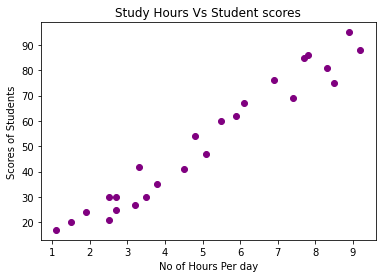

In [6]:
plt.xlabel('No of Hours Per day')
plt.ylabel('Scores of Students')
plt.title('Study Hours Vs Student scores')
plt.scatter(x='Hours',y='Scores',data=student_dataset,marker='o',color='purple')

plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### Data Preparation
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
x1 = student_dataset.iloc[:,0].values
y1 = student_dataset.iloc[:,1].values

x = x1.reshape(-1,1)
y = y1.reshape(-1,1)

### Split train and test
We make use of Scikit Learn's train_test_split() method for splitting data into training and testing data in a 70:30 split ratio.

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

### Training Stage

We move on to training the Linear Regression model on the training data formed above.

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Draw predicted value through line equation

y=mx+C,, m means co-efficients, c means intercept, x is input data

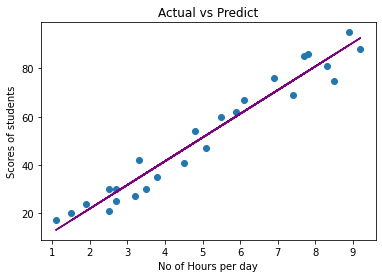

In [10]:
line = lr.coef_*x+lr.intercept_

plt.scatter(x, y)
plt.plot(x, line,color='purple')
plt.title('Actual vs Predict')
plt.xlabel('No of Hours per day')
plt.ylabel('Scores of students')
plt.show()

### Making Predictions 
Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
y_predict=lr.predict(x_test)
y_predict

array([[60.21748395],
       [33.70602374],
       [17.01362287],
       [77.89179076],
       [13.08599914],
       [20.94124661],
       [74.94607296],
       [36.65174155]])

In [12]:

new_stud_dataset=pd.DataFrame({'Actual':[y_test],'Predict':[y_predict]})
new_stud_dataset

,Actual,Predict
0,"[[62], [27], [20], [85], [17], [24], [69], [30]]","[[60.217483954438215], [33.706023744894594], [..."


### Model Evaluation
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [13]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:", mean_absolute_error(y_test, y_predict))

Mean Absolute Error: 4.769211864836753


In [14]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:", mean_squared_error(y_test, y_predict))

Mean Squared Error: 26.48375364566918


In [15]:
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_predict)))

Root Mean Square Error: 5.146236843137826


### Solution

In [16]:
hours = np.array(9.25)
hours = hours.reshape(-1, 1)
pred = lr.predict(hours)
print("If the student studies for 9.25 hours perday, he is expected to score {0} marks.".format(pred[0]))

If the student studies for 9.25 hours perday, he is expected to score [93.11133273] marks.


### Conclusion
#### After successful model building and obtaining predictions on test data, we can conclude that 'if a student studies for 9.25 hours/day, he is expected to score 93.11 marks !'.